# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
%matplotlib inline

In [119]:
df = pd.read_csv('imdb.csv', sep='\t')
df.columns[19:]

Index([u'imdbRating', u'imdbVotes', u'Gross', u'aamir khan', u'al pacino',
       u'alec guinness', u'ben kingsley', u'brad pitt', u'bruce willis',
       u'carrie fisher',
       ...
       u'war_y', u'war ii', u'way', u'wife', u'woman', u'work', u'world',
       u'world war', u'year', u'young'],
      dtype='object', length=153)

In [120]:
# Assign the rating to a y vector and the binary columns to an X feature matrix
df = pd.read_csv('imdb.csv', sep='\t')
df.columns[:25]
y = df['imdbRating']
X = df.iloc[:,20:]
scaler = StandardScaler()
X_scld = scaler.fit_transform(X)

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

[ 0.02140087 -0.27509294  0.03260567]


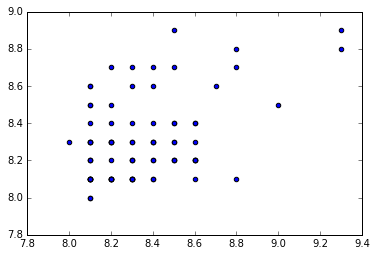

-0.37611298741173149

In [121]:
dtr = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)
dtr.fit(X_train, y_train)
scrs = cross_val_score(dtr, X_train, y_train)
print scrs
y_pred = dtr.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
dtr.score(X_test, y_test)

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

[ 0.475373   -0.30937792  0.26695697  0.35660027  0.48063685]


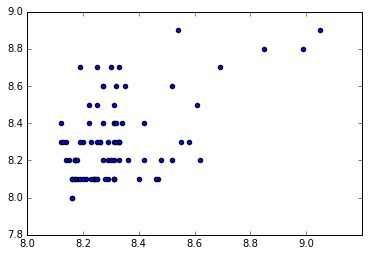

0.18508627571384739

In [122]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)
scores = cross_val_score(rand_forest, X_train, y_train, cv=5)
print scores
y_pred = rand_forest.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
rand_forest.score(X_test, y_test)

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

[ 0.29534554  0.33781509  0.34461734]


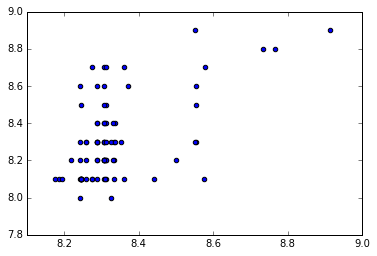

0.294428241085
The score is higher still.


In [123]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
scores = cross_val_score(abr, X_train, y_train)
print scores
y_pred = abr.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
print abr.score(X_test, y_test)
print 'The score is higher still.'

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

[ 0.40935848  0.23133535  0.41907836]


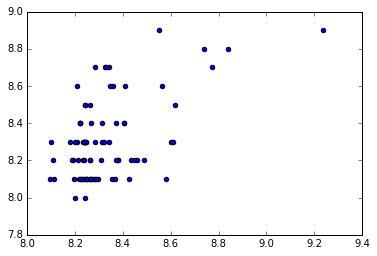

The score is not as good as the AdaBoost regressor score.


In [125]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
scores = cross_val_score(gbr, X_train, y_train)
print scores
y_pred = gbr.predict(X_test)
plt.scatter(y_pred, y_test)
plt.show()
gbr.score(X_test, y_test)
print 'The score is not as good as the AdaBoost regressor score.'

## 5. Tableau Practice

Put your data into Tableau. Once it is there, make a new url on your website and upload your new Tableau document to your site. Post your website's URL below.

## Bonus

Take the best model and try to improve it using grid search.